# 인공지능(머신러닝)
## 지도학습
* 문제와 정답을 알려주어 학습시킨 뒤 패턴을 찾는 것
* 분류분석, 회귀분석
## 비지도학습
* 문제만 알려주고 알고리즘이 알아서 패턴(인사이트)을 찾는 것
* 군집분석

# Tree 기반 모델 : 분류 분석의 대표적인 알고리즘
## Decision Tree 의사결정나무
* 데이터를 분할해서 조건문처럼 분기해 나가면서 예측하는 Tree 기반 모델
* 스무고개와 비슷하게 계속해서 질문을 던져서 분리하는 스타일
### 장점
* 시각화가 쉽고 직관적
* 직관적이고 해석이 쉬움
* feature(변수) scaling이 필요없음(MinMax, StandardScaler 사용하지 않아도 됨)
* 범주형(DecisionTreeClassifier), 수치형(DecisionTreeRegressor) 자료 모두를 분석할 수 있음
### 단점
* overfitting(과적합)이 잘 일어남
* 최적의 트리를 찾기 어렵고 시간이 오래 걸릴 수 있음

## ML 파이프라인
0. 필요한 라이브러리 로딩
1. titanic 데이터 로딩
2. 데이터전처리(결측값처리, 이상값탐지)
3. EDA 탐색적 데이터 분석(각 컬럼의 데이터 분포, 그래프, 문자→숫자, 상관관계 heatmap)
4. Feature Engineering(변수 선택, 새로운 특성 생성, 카테고리 변수의 더미 변수화 one-hot encoding)
5. 최종 선택된 변수를 독립변수(X)와 종속변수(y)로 분리
6. sklearn의 train_test_split을 불러와서 train, test 세트로 분리
7. sklearn에서 DecisionTreeClassifier를 불러와서 모델 훈련
8. test 세트를 모델에 넣어서 예측값 생성(pred)
9. accuracy_score(), classification_report()를 이용해서 모델의 성능 확인

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [62]:
titanic = pd.read_csv('./data/Titanic_train.csv')

In [3]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* 결측값은 Age 컬럼, Cabin 컬럼, Embarked 컬럼에 존재함

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Fare의 중간값과 최대값의 차이가 많이 나서 이상치로 보임

### 결측값 처리
* Age, Cabin, embarked

#### 결측률 확인해보기

In [8]:
titanic.isna().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* Cabin 컬럼은 결측률이 77%로 너무 높으므로 삭제
* Age와 Embarked 컬럼은 어떤 값으로 대체할지 결정 필요

In [69]:
titanic.drop('Cabin',axis=1,inplace=True)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Age는 int타입이고 통계량에 별다른 특이점은 보이지 않으므로 평균으로 결측값을 대체
* Embarked는 결측값 비율이 매우 적고 object 타입이므로 최빈값으로 결측값을 대체

In [24]:
age_na_idx = titanic[titanic['Age'].isna()].index
emb_na_idx = titanic[titanic['Embarked'].isna()].index

In [70]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [28]:
titanic.loc[age_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.699118,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,29.699118,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.699118,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.699118,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,29.699118,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,29.699118,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,29.699118,0,0,349217,7.8958,S


In [71]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [32]:
titanic.loc[emb_na_idx]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,S


In [61]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 이상값 탐지

### ✅ describe() 확인 시 이 3가지 체크
1. 평균 vs. 중간값 vs. 최대값 (튀는 값 있는지)
2. 표준편차(std) (값의 흩어짐이 너무 크진 않은지)
3. 25%, 75% 분위수 간격 (IQR이 작고 max가 크면 이상값일 확률 높음)

#### ✴️ 왜 그런가?
1. 정규분포 가정일 경우:<br>
mean ± 1*std → 약 68% 포함 <br>
mean ± 2*std → 약 95% 포함 <br>
mean ± 3*std → 약 99.7% 포함 <br>

➡ 이걸 기준으로 **"mean + 3*std 이상은 이상값"** 이라고 흔히 판단해.<br>
➡ 중간값(50%)과 max가 이 범위를 훌쩍 넘는다면 → 이상값 가능성 매우 높음

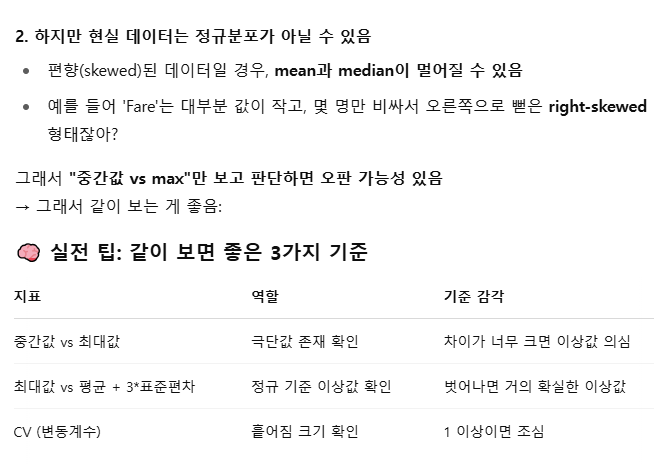

In [34]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 이상값 탐지 함수로 만들기!!!

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def detailed_outlier_report(df, z_thresh=3, rare_thresh=0.01, visualize=True):
    num_cols = df.select_dtypes(include=np.number).columns
    cat_cols = df.select_dtypes(exclude=np.number).columns
    
    print("🧼 [결측치 비율 확인]\n")
    null_ratios = df.isnull().mean()
    for col, ratio in null_ratios.items():
        if ratio > 0:
            msg = "⚠️ 높음" if ratio > 0.3 else "△ 주의"
            print(f" - {col}: {ratio:.1%} {msg}")

    print("\n📊 [숫자형 변수 이상값 리포트]\n")

    for col in num_cols:
        series = df[col].dropna()
        q50 = series.median()
        max_val = series.max()
        min_val = series.min()
        mean = series.mean()
        std = series.std()
        upper_std = mean + 3 * std
        lower_std = mean - 3 * std
        z_scores = np.abs(stats.zscore(series))
        z_outliers = (z_scores > z_thresh).sum()

        # IQR 계산
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        iqr_lower = Q1 - 1.5 * IQR
        iqr_upper = Q3 + 1.5 * IQR
        iqr_outliers = ((series < iqr_lower) | (series > iqr_upper)).sum()

        print(f"📌 {col}")
        print(f" - Median: {q50:.2f}")
        print(f" - Max: {max_val:.2f} / Min: {min_val:.2f}")
        print(f" - Mean ± 3*Std: [{lower_std:.2f}, {upper_std:.2f}]")
        if max_val > upper_std or min_val < lower_std:
            print("   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)")
        else:
            print("   → ✅ 정상 범위 내")

        print(f" - Z-score > {z_thresh}: {z_outliers}건")
        if z_outliers > 0:
            print("   → 🚨 이상값 의심됨 (Z-score 기준)")
        else:
            print("   → ✅ Z-score 이상 없음")

        print(f" - IQR 범위: [{iqr_lower:.2f}, {iqr_upper:.2f}]")
        print(f" - IQR 기준 이상값: {iqr_outliers}건")
        if iqr_outliers > 0:
            print("   → 🚨 이상값 의심됨 (IQR 기준)")
        else:
            print("   → ✅ IQR 기준 이상 없음")

        print("")

        if visualize:
            plt.figure(figsize=(6, 1.5))
            sns.boxplot(x=series, color='skyblue')
            plt.title(f'Boxplot - {col}')
            plt.tight_layout()
            plt.show()

    print("\n📦 [범주형 변수 희귀값 확인] (비율 < {:.1%})".format(rare_thresh))
    for col in cat_cols:
        freq = df[col].value_counts(normalize=True)
        rare_categories = freq[freq < rare_thresh].index
        rare_mask = df[col].isin(rare_categories)
        rare_count = rare_mask.sum()
        rare_ratio = rare_count / len(df)

        if rare_count > 0:
            print(f" - {col}: 희귀값 {rare_count}개 ({rare_ratio:.1%}) → ⚠️ 희귀 범주 존재")
        else:
            print(f" - {col}: ✅ 전부 적정 분포")


🧼 [결측치 비율 확인]

 - Age: 19.9% △ 주의
 - Cabin: 77.1% ⚠️ 높음
 - Embarked: 0.2% △ 주의

📊 [숫자형 변수 이상값 리포트]

📌 PassengerId
 - Median: 446.00
 - Max: 891.00 / Min: 1.00
 - Mean ± 3*Std: [-326.06, 1218.06]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-444.00, 1336.00]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



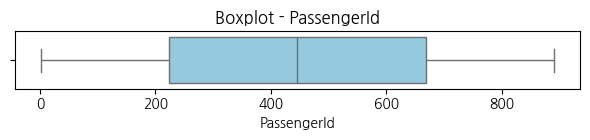

📌 Survived
 - Median: 0.00
 - Max: 1.00 / Min: 0.00
 - Mean ± 3*Std: [-1.08, 1.84]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-1.50, 2.50]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



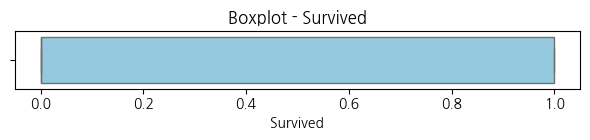

📌 Pclass
 - Median: 3.00
 - Max: 3.00 / Min: 1.00
 - Mean ± 3*Std: [-0.20, 4.82]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [0.50, 4.50]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



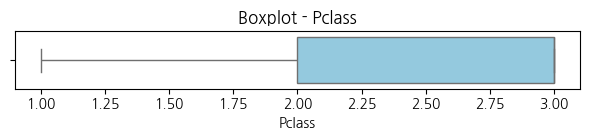

📌 Age
 - Median: 28.00
 - Max: 80.00 / Min: 0.42
 - Mean ± 3*Std: [-13.88, 73.28]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 2건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-6.69, 64.81]
 - IQR 기준 이상값: 11건
   → 🚨 이상값 의심됨 (IQR 기준)



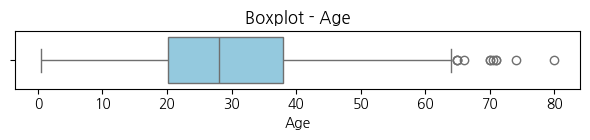

📌 SibSp
 - Median: 0.00
 - Max: 8.00 / Min: 0.00
 - Mean ± 3*Std: [-2.79, 3.83]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 30건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-1.50, 2.50]
 - IQR 기준 이상값: 46건
   → 🚨 이상값 의심됨 (IQR 기준)



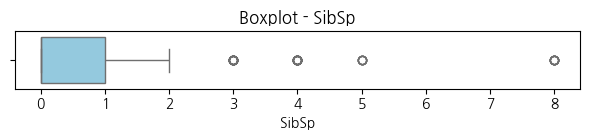

📌 Parch
 - Median: 0.00
 - Max: 6.00 / Min: 0.00
 - Mean ± 3*Std: [-2.04, 2.80]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 15건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 213건
   → 🚨 이상값 의심됨 (IQR 기준)



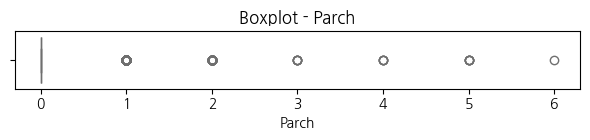

📌 Fare
 - Median: 14.45
 - Max: 512.33 / Min: 0.00
 - Mean ± 3*Std: [-116.88, 181.28]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 20건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-26.72, 65.63]
 - IQR 기준 이상값: 116건
   → 🚨 이상값 의심됨 (IQR 기준)



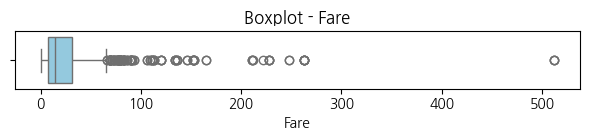


📦 [범주형 변수 희귀값 확인] (비율 < 1.0%)
 - Name: 희귀값 891개 (100.0%) → ⚠️ 희귀 범주 존재
 - Sex: ✅ 전부 적정 분포
 - Ticket: 희귀값 891개 (100.0%) → ⚠️ 희귀 범주 존재
 - Cabin: 희귀값 177개 (19.9%) → ⚠️ 희귀 범주 존재
 - Embarked: ✅ 전부 적정 분포


In [68]:
detailed_outlier_report(titanic)